# Compare CHUQ and KDUQ potentials

In [1]:
import pickle
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from jitr.reactions import ElasticReaction

In [4]:
from jitr.optical_potentials import chuq, kduq

In [5]:
neutron = (1, 0)
proton = (1, 1)

In [6]:
target = (208, 82)
projectile = proton
energy_lab = 20
rxn = ElasticReaction(target=target, projectile=projectile)

In [7]:
# kduq_samples = kduq.get_samples_federal(projectile)
# chuq_samples = chuq.get_samples_federal(projectile)

In [15]:
kduq_samples = kduq.get_samples_democratic(projectile)
chuq_samples = chuq.get_samples_democratic(projectile)

In [16]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=20, Ecm=19.90358178532635, mu=np.float64(953.4094348710811), k=np.float64(0.9821249468203239), eta=np.float64(2.9437804344702942))

In [17]:
r = np.linspace(0.1, 10, 100)
chuq_v_central = np.zeros((chuq.NUM_POSTERIOR_SAMPLES, 100), dtype=complex)
kduq_v_central = np.zeros((kduq.NUM_POSTERIOR_SAMPLES, 100), dtype=complex)
chuq_v_so = np.zeros((chuq.NUM_POSTERIOR_SAMPLES, 100), dtype=complex)
kduq_v_so = np.zeros((kduq.NUM_POSTERIOR_SAMPLES, 100), dtype=complex)

for i, kduq_sample in enumerate(kduq_samples):
    coul, cent, so = kduq.calculate_params(
        projectile, target, kinematics.Elab, *kduq_sample
    )
    kduq_v_central[i, :] = kduq.central(r, *cent)
    kduq_v_so[i, :] = kduq.spin_orbit(r, *so)

for i, chuq_sample in enumerate(chuq_samples):
    coul, cent, so = chuq.calculate_params(
        projectile, target, kinematics.Elab, *chuq_sample
    )
    chuq_v_central[i, :] = chuq.central(r, *cent)
    chuq_v_so[i, :] = chuq.spin_orbit(r, *so)

/home/beyerk/Projects/jitr/src/jitr/optical_potentials/kduq.py:397: RuntimeWarning: overflow encountered in exp
  d2 = d2_0 + d2_A / (1 + np.exp((A - d2_A3) / d2_A2))


In [18]:
def get_ci(x):
    return np.percentile(x.real, [5, 50, 95], axis=0) + 1j * np.percentile(
        x.imag, [5, 50, 95], axis=0
    )

In [19]:
chuq_v_central = get_ci(chuq_v_central)
chuq_v_so = get_ci(chuq_v_so)
kduq_v_central = get_ci(kduq_v_central)
kduq_v_so = get_ci(kduq_v_so)

Text(0.5, 0, '$r$ [fm]')

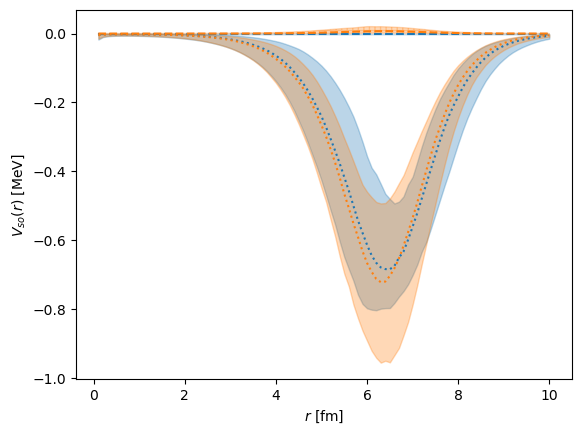

In [20]:
(p,) = plt.plot(r, chuq_v_so[1].real, ":")
plt.fill_between(
    r, chuq_v_so[0].real, chuq_v_so[2].real, alpha=0.3, color=p.get_color()
)

plt.plot(r, chuq_v_so[1].imag, "--", color=p.get_color())
plt.fill_between(
    r,
    chuq_v_so[0].imag,
    chuq_v_so[2].imag,
    hatch="|-|-|-",
    alpha=0.3,
    color=p.get_color(),
)

(p,) = plt.plot(r, kduq_v_so[1].real, ":")
plt.fill_between(
    r, kduq_v_so[0].real, kduq_v_so[2].real, alpha=0.3, color=p.get_color()
)

plt.plot(r, kduq_v_so[1].imag, "--", color=p.get_color())
plt.fill_between(
    r,
    kduq_v_so[0].imag,
    kduq_v_so[2].imag,
    hatch="|-|-|-",
    alpha=0.3,
    color=p.get_color(),
)


plt.ylabel(r"$V_{so}(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")

Text(0.5, 0, '$r$ [fm]')

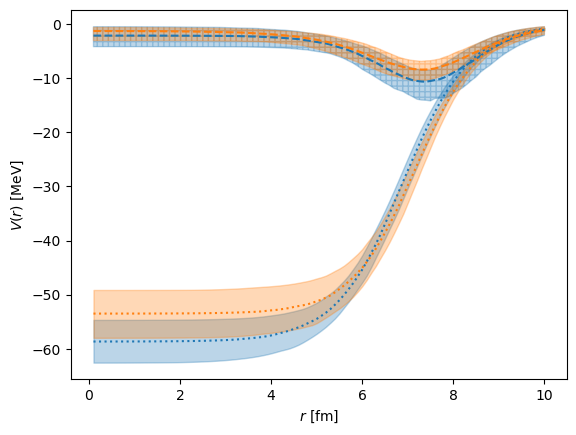

In [21]:
(p,) = plt.plot(r, chuq_v_central[1].real, ":")
plt.fill_between(
    r, chuq_v_central[0].real, chuq_v_central[2].real, alpha=0.3, color=p.get_color()
)

plt.plot(r, chuq_v_central[1].imag, "--", color=p.get_color())
plt.fill_between(
    r,
    chuq_v_central[0].imag,
    chuq_v_central[2].imag,
    hatch="|-|-|-",
    alpha=0.3,
    color=p.get_color(),
)

(p,) = plt.plot(r, kduq_v_central[1].real, ":")
plt.fill_between(
    r, kduq_v_central[0].real, kduq_v_central[2].real, alpha=0.3, color=p.get_color()
)

plt.plot(r, kduq_v_central[1].imag, "--", color=p.get_color())
plt.fill_between(
    r,
    kduq_v_central[0].imag,
    kduq_v_central[2].imag,
    hatch="|-|-|-",
    alpha=0.3,
    color=p.get_color(),
)

plt.ylabel(r"$V(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")